In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
df=pd.read_csv("data\Dataset.csv")
df

<>:1: SyntaxWarning: invalid escape sequence '\D'
<>:1: SyntaxWarning: invalid escape sequence '\D'
C:\Users\giria\AppData\Local\Temp\ipykernel_22008\2028769358.py:1: SyntaxWarning: invalid escape sequence '\D'
  df=pd.read_csv("data\Dataset.csv")


,school,sex,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,...,Dalc,health,absences,G1,G2,G3,Feature_1,Feature_2,Feature_3,romantic
0,GP,F,U,GT3,A,4,4.0,at_home,teacher,course,...,1,3,4.0,0,11.0,11,18.0,2.0,1.0,no
1,GP,F,U,GT3,T,1,1.0,at_home,other,course,...,1,3,2.0,9,11.0,11,17.0,2.0,1.0,no
2,GP,F,U,LE3,T,1,1.0,at_home,other,other,...,2,3,6.0,12,13.0,12,15.0,NaN,3.0,no
3,GP,F,U,GT3,T,4,2.0,health,services,home,...,1,5,0.0,14,14.0,14,15.0,3.0,1.0,yes
4,GP,F,U,GT3,T,3,3.0,other,other,home,...,1,5,0.0,11,13.0,13,16.0,NaN,2.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,R,GT3,T,2,3.0,services,other,course,...,1,5,4.0,10,11.0,10,19.0,3.0,2.0,no
645,MS,F,U,LE3,T,3,1.0,teacher,services,course,...,1,1,NaN,15,15.0,16,18.0,2.0,1.0,no
646,MS,F,U,GT3,T,1,1.0,other,other,course,...,1,5,6.0,11,12.0,9,18.0,NaN,1.0,no
647,MS,M,U,LE3,T,3,1.0,services,services,course,...,3,2,6.0,10,10.0,10,NaN,1.0,4.0,no


###  LEVEL--1

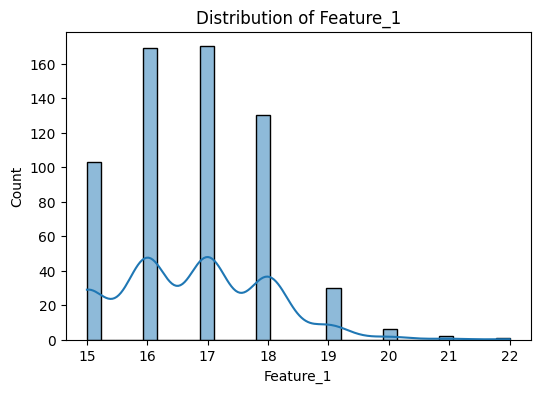

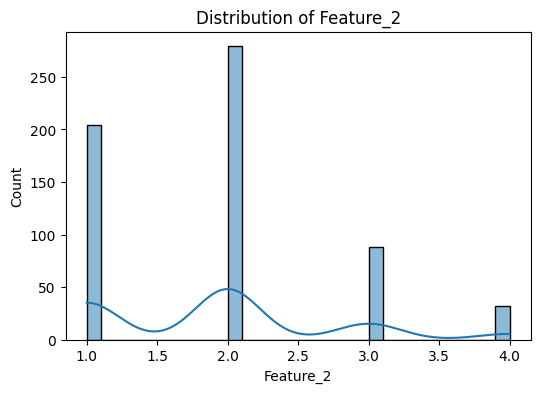

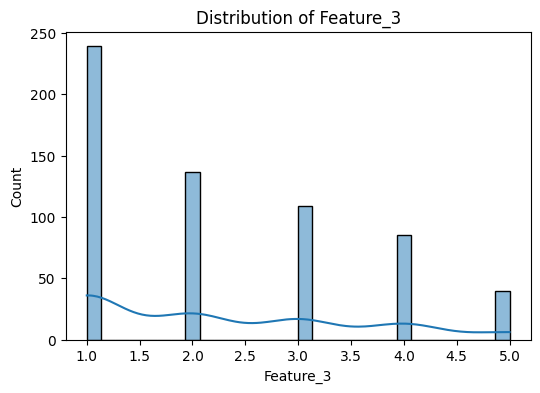

In [19]:
anon_features = ['Feature_1', 'Feature_2', 'Feature_3']
df[anon_features].describe()

for col in anon_features:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.show()


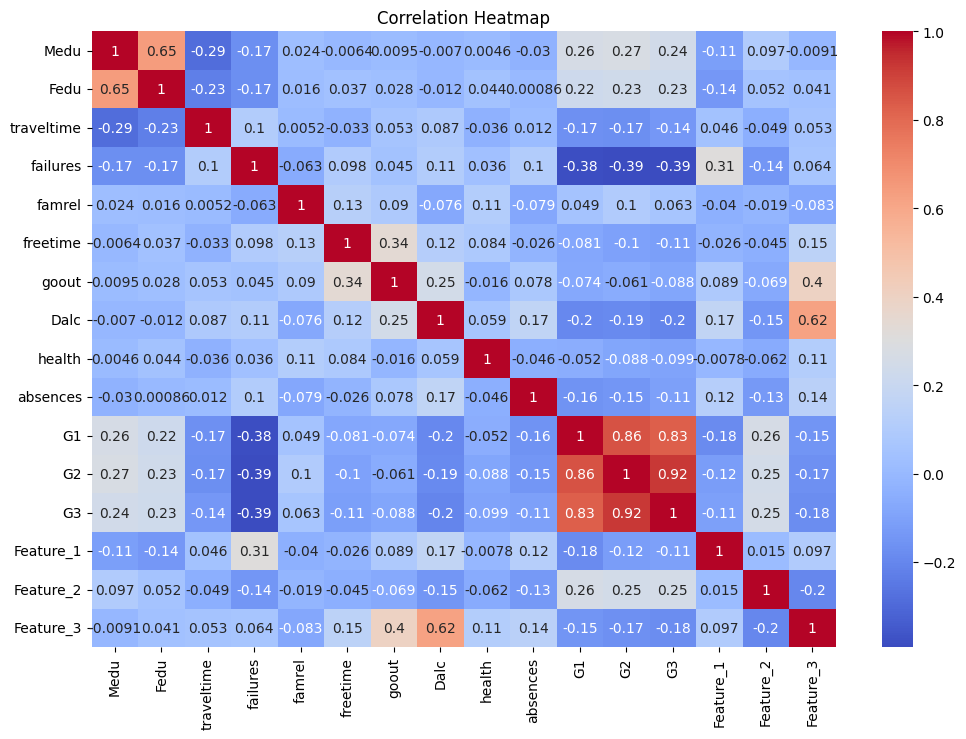

In [20]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

#### As feature_1 have close connections with failures,absence,dalc and negligency in academics also shows negligency of families too.  it may be age as failed students have to study with their junior.
#### As feature_2 have close relation with G1,G2,G3 it may be related to their academics.It may be no of subjects/topics good at or rating of their hobbies or daily time(hr) they give to solve puzzles/do some creative
#### As feature_2 have close relation with goout and Dalc it may be related to their social life. May be frequency of clubbing(weekly),or also may be pocket money (_k in week) or may be no of trips per year.

In [21]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder

LEVEL --2

In [22]:
numerical_cols = df.select_dtypes(include=["number"]).columns.tolist()
categorical_cols = df.select_dtypes(include=["object"]).columns.tolist()

df_encoded = df.copy()
encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df_encoded[col] = df_encoded[col].astype(str)
    df_encoded[col] = le.fit_transform(df_encoded[col])
    encoders[col] = le


imputer = KNNImputer(n_neighbors=100)
df_imputed_array = imputer.fit_transform(df_encoded)

df_imputed = pd.DataFrame(df_imputed_array, columns=df.columns)

for col in categorical_cols:
    df_imputed[col] = df_imputed[col].round().astype(int)
    df_imputed[col] = encoders[col].inverse_transform(df_imputed[col])


missing_before = df.isnull().sum()
missing_after = df_imputed.isnull().sum()

missing_before, missing_after, df_imputed.head()


(school         0
 sex            0
 address        0
 famsize       50
 Pstatus        0
 Medu           0
 Fedu          73
 Mjob           0
 Fjob           0
 reason         0
 guardian       0
 traveltime    73
 failures       0
 schoolsup      0
 famsup         0
 paid           0
 activities     0
 nursery        0
 higher        76
 internet       0
 famrel         0
 freetime      45
 goout          0
 Dalc           0
 health         0
 absences      69
 G1             0
 G2            35
 G3             0
 Feature_1     38
 Feature_2     46
 Feature_3     39
 romantic       0
 dtype: int64,
 school        0
 sex           0
 address       0
 famsize       0
 Pstatus       0
 Medu          0
 Fedu          0
 Mjob          0
 Fjob          0
 reason        0
 guardian      0
 traveltime    0
 failures      0
 schoolsup     0
 famsup        0
 paid          0
 activities    0
 nursery       0
 higher        0
 internet      0
 famrel        0
 freetime      0
 goout         0


In [ ]:
df_imputed

,school,sex,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,...,Dalc,health,absences,G1,G2,G3,Feature_1,Feature_2,Feature_3,romantic
0,GP,F,U,GT3,A,4.0,4.0,at_home,teacher,course,...,1.0,3.0,4.00,0.0,11.0,11.0,18.00,2.00,1.0,no
1,GP,F,U,GT3,T,1.0,1.0,at_home,other,course,...,1.0,3.0,2.00,9.0,11.0,11.0,17.00,2.00,1.0,no
2,GP,F,U,LE3,T,1.0,1.0,at_home,other,other,...,2.0,3.0,6.00,12.0,13.0,12.0,15.00,1.95,3.0,no
3,GP,F,U,GT3,T,4.0,2.0,health,services,home,...,1.0,5.0,0.00,14.0,14.0,14.0,15.00,3.00,1.0,yes
4,GP,F,U,GT3,T,3.0,3.0,other,other,home,...,1.0,5.0,0.00,11.0,13.0,13.0,16.00,2.07,2.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,R,GT3,T,2.0,3.0,services,other,course,...,1.0,5.0,4.00,10.0,11.0,10.0,19.00,3.00,2.0,no
645,MS,F,U,LE3,T,3.0,1.0,teacher,services,course,...,1.0,1.0,3.26,15.0,15.0,16.0,18.00,2.00,1.0,no
646,MS,F,U,GT3,T,1.0,1.0,other,other,course,...,1.0,5.0,6.00,11.0,12.0,9.0,18.00,1.83,1.0,no
647,MS,M,U,LE3,T,3.0,1.0,services,services,course,...,3.0,2.0,6.00,10.0,10.0,10.0,16.92,1.00,4.0,no


#### LEVEL--3

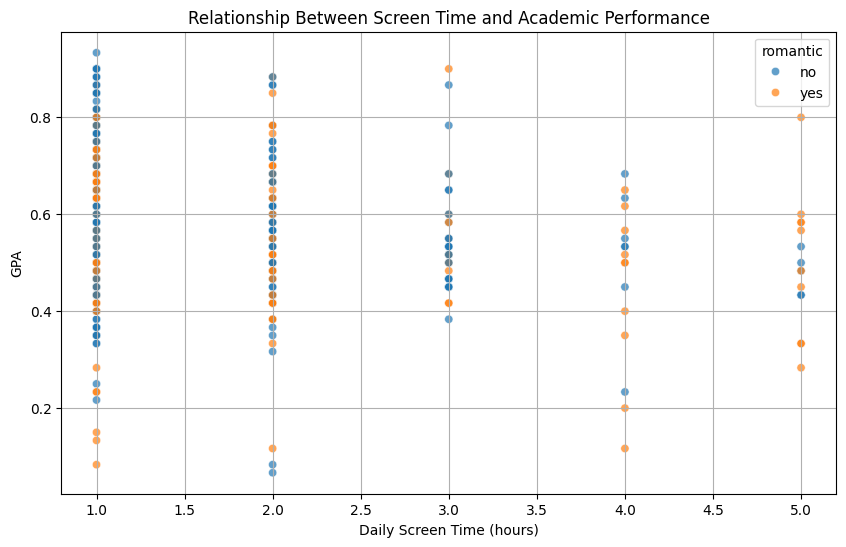

In [24]:
# Insight 1: Does screen time affect academic performance?
df["grade"]=(df["G1"]+df["G2"]+df["G3"])/60
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x=df['Dalc'], y=df['grade'], hue=df['romantic'], alpha=0.7)
plt.title('Relationship Between Screen Time and Academic Performance')
plt.xlabel('Daily Screen Time (hours)')
plt.ylabel('GPA')
plt.grid(True)
plt.show()

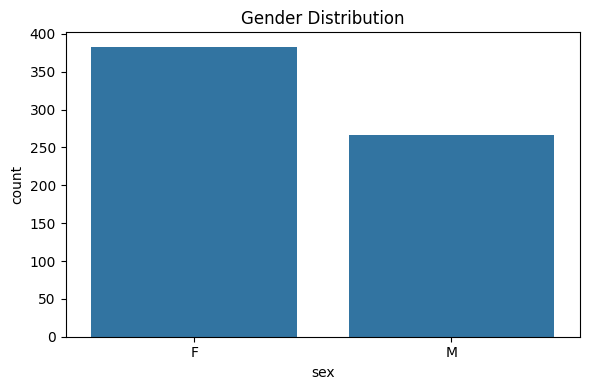

In [ ]:
#2: What is the gender distribution among students?
plt.figure(figsize=(6,4))
sns.countplot(x='sex', data=df)
plt.title('Gender Distribution')
plt.xlabel('sex')
plt.ylabel('count')
plt.tight_layout()
plt.show()



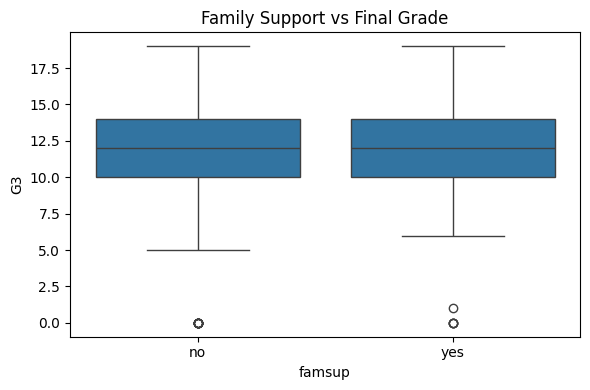

In [ ]:
# 3. Family support vs final grade
plt.figure(figsize=(6,4))
sns.boxplot(x='famsup', y='G3', data=df)
plt.title('Family Support vs Final Grade')
plt.xlabel('famsup')
plt.ylabel('G3')
plt.tight_layout()
plt.show()

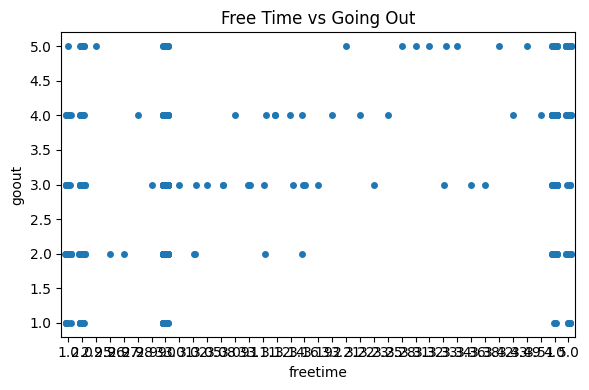

In [ ]:

# 4. Free time vs going out (scatterplot)
plt.figure(figsize=(6,4))
sns.stripplot(x='freetime', y='goout', data=df, jitter=.2)
plt.title('Free Time vs Going Out')
plt.xlabel('freetime')
plt.ylabel('goout')
plt.tight_layout()
plt.show()

In [25]:
df_imputed.to_csv("Cleaned.csv", index=False)

### LEVEL--4

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score,precision_recall_curve

In [27]:
df=df_imputed
X=df.drop('romantic',axis=1)
y=df['romantic'].map({'yes':1,'no':0})

In [28]:
categorical_cols = [cname for cname in X.columns if 
                    X[cname].dtype == "object" and cname != 'romantic']
numerical_cols = [cname for cname in X.columns if 
                 X[cname].dtype in ['int64', 'float64']]

In [29]:
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)])

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=60,stratify=y)

In [31]:
X_test

,school,sex,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,...,goout,Dalc,health,absences,G1,G2,G3,Feature_1,Feature_2,Feature_3
229,GP,F,U,LE3,T,3.0,2.49,other,other,reputation,...,4.0,1.0,1.0,2.00,14.0,16.00,15.0,17.00,2.0,3.00
36,GP,M,U,nan,T,4.0,3.00,teacher,services,home,...,3.0,1.0,4.0,2.78,14.0,14.00,14.0,15.00,3.0,1.00
451,MS,M,R,GT3,T,1.0,2.00,other,other,course,...,3.0,1.0,5.0,0.00,10.0,11.00,11.0,16.00,2.0,2.23
474,MS,M,R,nan,T,1.0,3.00,at_home,other,reputation,...,4.0,3.0,3.0,3.77,10.0,10.53,11.0,15.00,1.0,2.68
580,MS,M,R,GT3,T,1.0,1.00,other,other,home,...,4.0,3.0,5.0,4.00,8.0,9.00,10.0,19.00,1.0,2.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,GP,M,U,GT3,A,4.0,4.00,other,services,reputation,...,3.0,5.0,3.0,0.00,11.0,12.00,12.0,16.51,4.0,5.00
468,MS,M,U,GT3,T,2.0,2.00,health,other,reputation,...,3.0,1.0,4.0,1.00,13.0,12.00,13.0,16.40,2.1,2.00
149,GP,M,U,GT3,T,4.0,3.00,teacher,services,course,...,2.0,1.0,3.0,6.00,9.0,11.00,11.0,15.00,4.0,1.00
582,MS,F,U,LE3,A,1.0,1.72,at_home,other,course,...,4.0,1.0,5.0,0.00,6.0,8.00,7.0,19.00,1.0,1.00


In [32]:
y_test

229    0
36     0
451    0
474    0
580    0
      ..
66     1
468    0
149    0
582    0
608    1
Name: romantic, Length: 130, dtype: int64

In [33]:
model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
clf = Pipeline(steps=[('preprocessor', preprocessor),('model', model)])

clf.fit(X_train, y_train)


y_pred = clf.predict(X_test)
print(y_pred)


[0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]


In [34]:
def yes_no(binary_value):
    binary_value = np.array(binary_value) 
    return np.where(binary_value == 1, 'yes', 'no')

print(yes_no(y_pred))

['no' 'no' 'no' 'no' 'yes' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'yes' 'no'
 'no' 'no' 'no' 'no' 'yes' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'yes' 'no'
 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no'
 'no' 'yes' 'no' 'no' 'yes' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no'
 'no' 'yes' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no'
 'no' 'no' 'yes' 'no' 'no' 'no' 'yes' 'no' 'no' 'no' 'no' 'no' 'yes' 'no'
 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'yes' 'no' 'no' 'no' 'no'
 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'yes' 'no' 'no' 'no' 'no'
 'no' 'no' 'no' 'no' 'no' 'no' 'yes' 'no' 'no' 'no' 'no' 'no' 'no' 'no'
 'no' 'no' 'no' 'no']


In [35]:
y_test.values

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1])

In [36]:
accuracy_score(y_test, y_pred)


0.6384615384615384

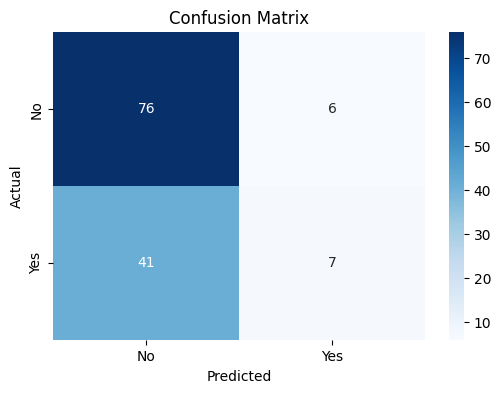

In [37]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No', 'Yes'],
            yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### Logistic Regression

In [38]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(class_weight='balanced',random_state=100, max_iter=5000,solver='liblinear')

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_pred_proba = clf.predict_proba(X_test)[:, 1] 

In [39]:
accuracy_score(y_test, y_pred)

0.6384615384615384

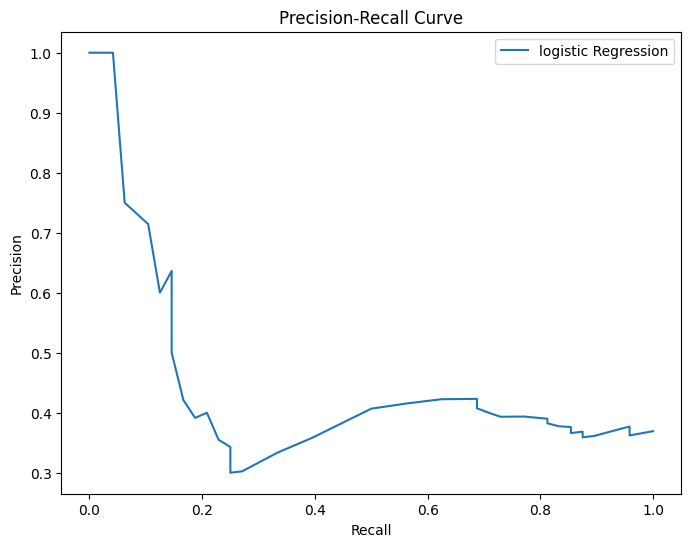

In [40]:
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label='logistic Regression')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()